(<matplotlib.image.AxesImage at 0x1bb013c2fd0>,
 Text(0.5, 1.0, 'GRAY: Original'))

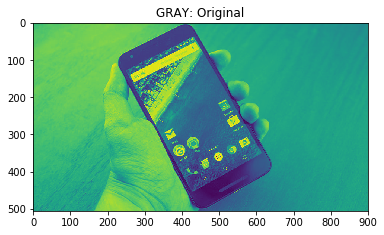

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import cv2

# Read an input image as 1-channel greyscale
dir = './smartphone.jpg'
src_color = cv2.imread( dir )
src_grey = cv2.cvtColor( src_color, cv2.COLOR_BGR2HSV )
img = cv2.imread(dir,cv2.IMREAD_GRAYSCALE)

# Show colormap of the greyscale input
img_colormap = cv2.applyColorMap( img, cv2.COLORMAP_JET )

# Read an threshold value and a value to set
thres = 70
val = 255

plt.imshow(img), plt.title("GRAY: Original")

(<matplotlib.image.AxesImage at 0x1bb01448518>,
 Text(0.5, 1.0, 'GRAY: Original + Colormap'))

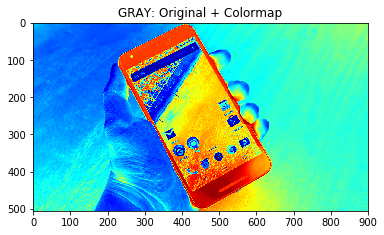

In [3]:
plt.imshow(img_colormap), plt.title("GRAY: Original + Colormap")

(<matplotlib.image.AxesImage at 0x1bb03b34b38>, Text(0.5, 1.0, 'seg_result'))

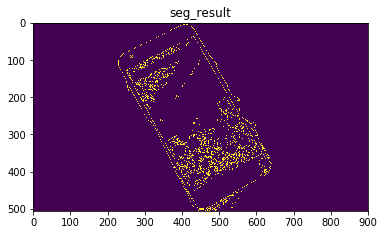

In [5]:
# Input must be a 1-channel image (8-bit or 32-bit)
ret,thresh1 = cv2.threshold(img,thres,val,cv2.THRESH_BINARY)

canny_th1 = 30
canny_th2 = 80

seg_canny = cv2.Canny( thresh1, canny_th1, canny_th2 )
seg_result = seg_canny
plt.imshow(seg_result), plt.title("seg_result")

(<matplotlib.image.AxesImage at 0x1bb03b98a20>, Text(0.5, 1.0, 'morph_result'))

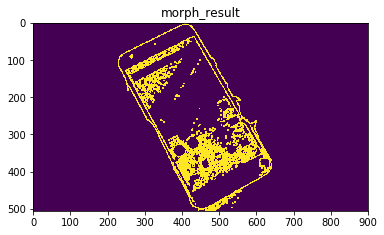

In [6]:
ksize = 3
cnt_erode = 0
cnt_dilate = 1
kernel = cv2.getStructuringElement( cv2.MORPH_RECT, (ksize,ksize) )
morph_result = cv2.erode ( seg_result, kernel, iterations=cnt_erode )
morph_result = cv2.dilate ( morph_result, kernel, iterations=cnt_dilate )

plt.imshow(morph_result), plt.title("morph_result")

(<matplotlib.image.AxesImage at 0x1bb04bbdf28>,
 Text(0.5, 1.0, 'drawContours: outline'))

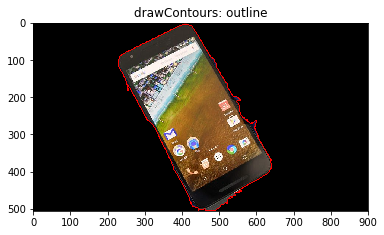

In [7]:
contours,hierarchy = cv2.findContours( morph_result,
                                       cv2.RETR_EXTERNAL,
                                       cv2.CHAIN_APPROX_NONE )

biggest_contour = sorted( contours,
                          key = cv2.contourArea,
                          reverse = True )[0]       # extract only the first (biggest) contour from the sorted list

src_color = cv2.drawContours ( src_color,
                                biggest_contour,  # draw one specific contour in the variable
                                -1,
                                (255,0,0),
                                thickness=3 )

mask = np.zeros_like( src_grey )
cv2.drawContours ( mask, 
                  [ biggest_contour ], 
                  0, 
                  (255,255,255), 
                  thickness=-1 )

result = src_color.copy()
result [ mask == 0 ] = 0

plt.imshow(result), plt.title("drawContours: outline")